Data Scientist: John Pan MD., MS., MSDS

In [1]:
#Load libraries for data processing
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import norm
## Supervised learning.
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn import metrics, preprocessing
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

In [ ]:
#reference:
#https://rstudio-pubs-static.s3.amazonaws.com/366220_6ff436e319204c64831c85a006280256.html (R coding)
#Source: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

In [2]:
os.chdir(r'H:\UCI machine learning\Breast-Cancer-Tumor-Prediction-master\Breast-Cancer-Tumor-Prediction-master')

In [3]:
df=pd.read_csv('data.csv')

In [4]:
df.shape

(569, 33)

In [5]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
df=df.drop(['Unnamed: 32'], axis=1)

In [7]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
df2 = df.groupby(['diagnosis'])['diagnosis'].count()
print(df2)

diagnosis
B    357
M    212
Name: diagnosis, dtype: int64


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [12]:
df1=df.drop(['id', 'diagnosis'], axis=1)

In [13]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


array([[<AxesSubplot:title={'center':'radius_mean'}>,
        <AxesSubplot:title={'center':'texture_mean'}>,
        <AxesSubplot:title={'center':'perimeter_mean'}>,
        <AxesSubplot:title={'center':'area_mean'}>,
        <AxesSubplot:title={'center':'smoothness_mean'}>],
       [<AxesSubplot:title={'center':'compactness_mean'}>,
        <AxesSubplot:title={'center':'concavity_mean'}>,
        <AxesSubplot:title={'center':'concave points_mean'}>,
        <AxesSubplot:title={'center':'symmetry_mean'}>,
        <AxesSubplot:title={'center':'fractal_dimension_mean'}>],
       [<AxesSubplot:title={'center':'radius_se'}>,
        <AxesSubplot:title={'center':'texture_se'}>,
        <AxesSubplot:title={'center':'perimeter_se'}>,
        <AxesSubplot:title={'center':'area_se'}>,
        <AxesSubplot:title={'center':'smoothness_se'}>],
       [<AxesSubplot:title={'center':'compactness_se'}>,
        <AxesSubplot:title={'center':'concavity_se'}>,
        <AxesSubplot:title={'center':'concav

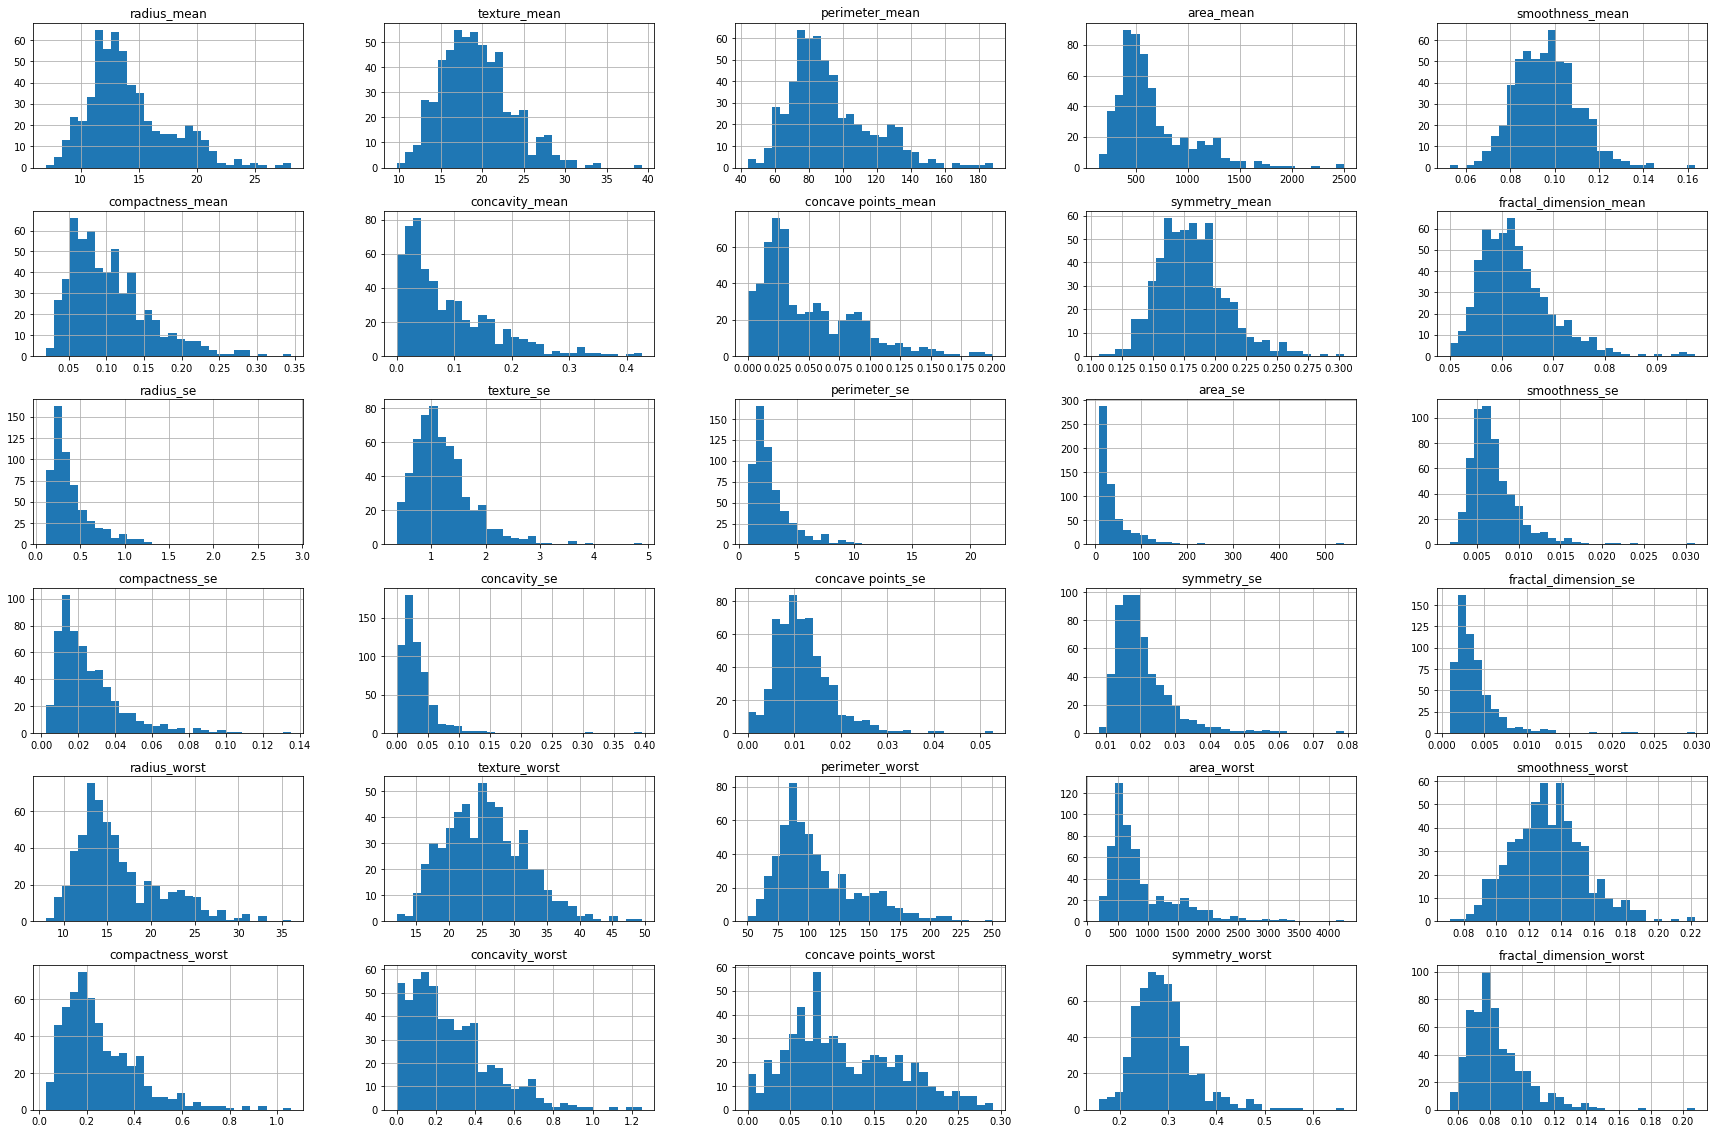

In [14]:
df1.hist(bins=30, figsize=(30, 20))

In [15]:
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

<AxesSubplot:>

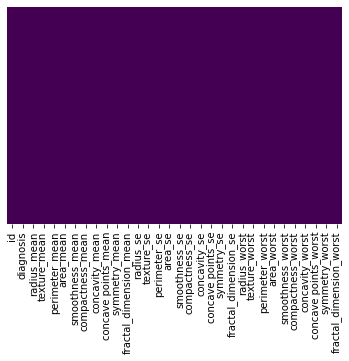

In [16]:
sns.heatmap(df.isnull(),yticklabels=False, cbar=False, cmap='viridis')

<AxesSubplot:>

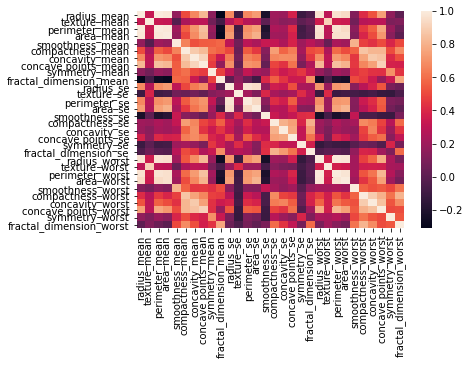

In [17]:
corr=df1.corr()

#heatmap
sns.heatmap(corr,
           xticklabels=corr.columns,
           yticklabels=corr.columns)


In [18]:
# Create correlation matrix
corr_matrix = df1.corr().abs()

<AxesSubplot:>

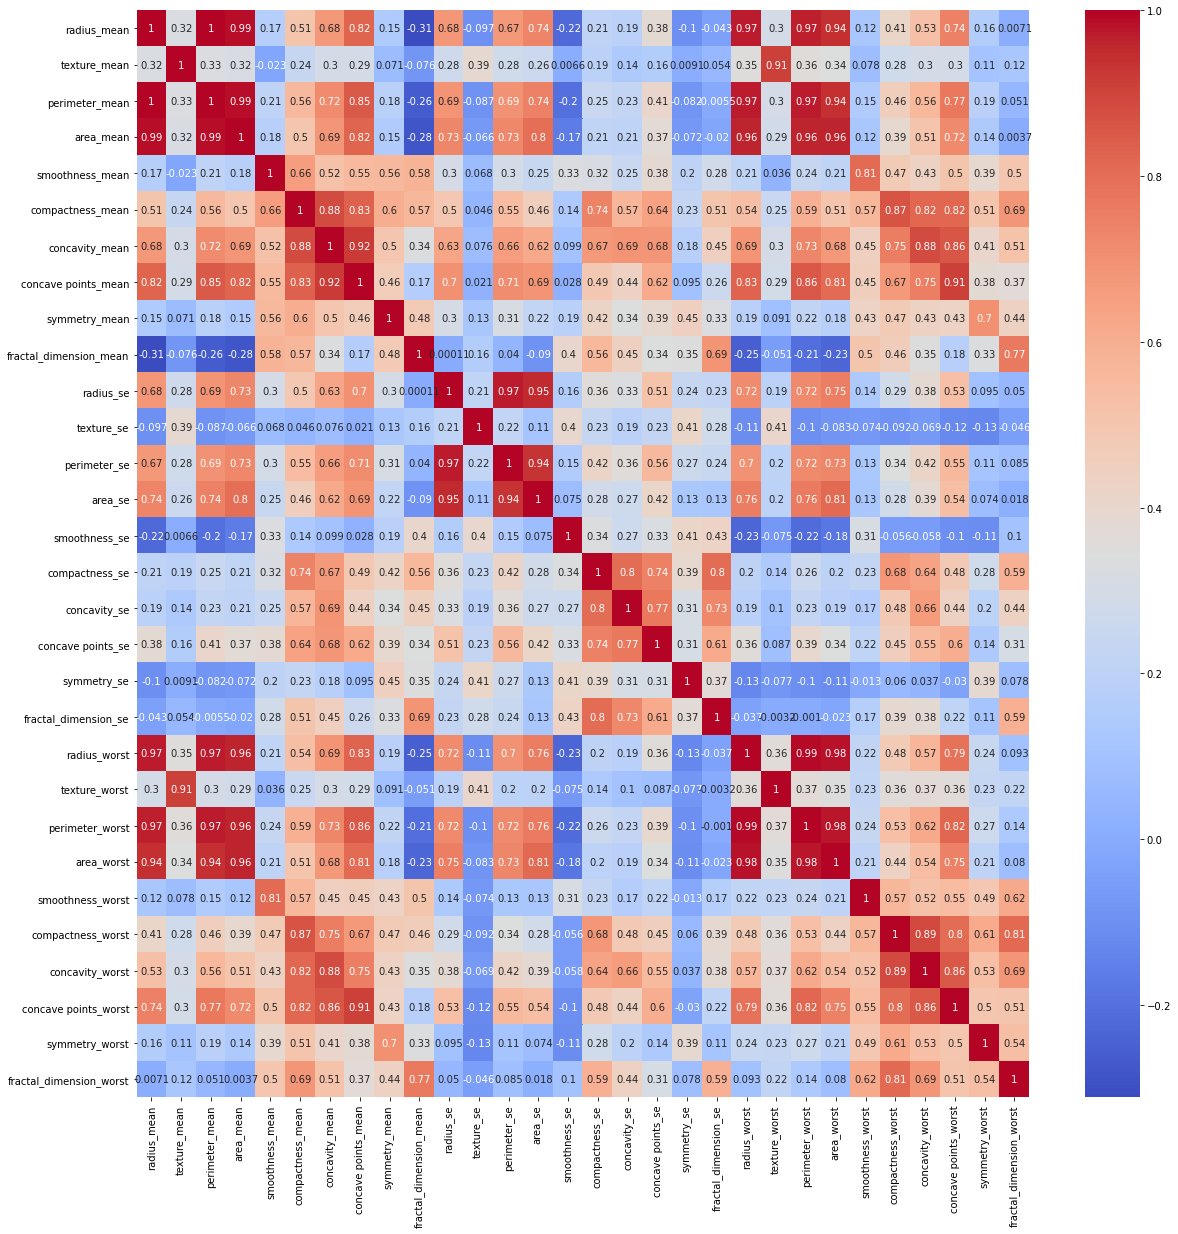

In [19]:
# Finding correlation among features using sns' heatmap
plt.figure(figsize=(20,20))
sns.heatmap(df1.corr(),annot=True,cmap='coolwarm')

<AxesSubplot:>

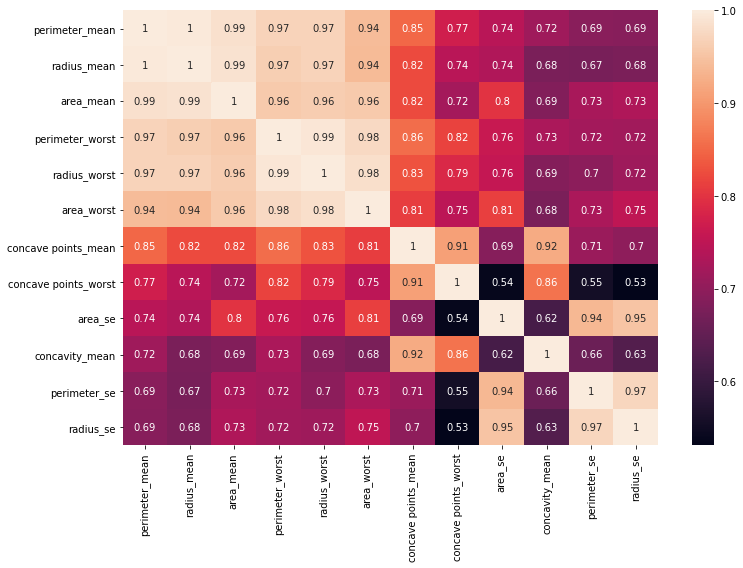

In [20]:
#Heatmap for top 12 correlation
k = 12
cols = df1.corr().nlargest(k, 'perimeter_mean')['perimeter_mean'].index
k_corr_matrix = df1[cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(k_corr_matrix, annot=True) #cmap=plt.cm.RdBu_r)

Text(0.5, 1.0, 'Perimeter vs Area')

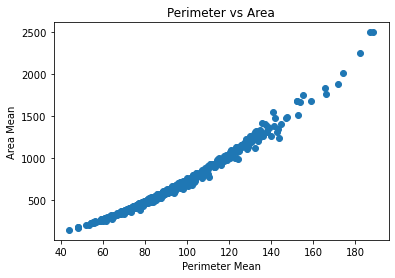

In [21]:
#elp(plt.scatter)
plt.scatter(df1['perimeter_mean'],df1['area_mean'])
plt.xlabel('Perimeter Mean')
plt.ylabel('Area Mean')
plt.title('Perimeter vs Area')

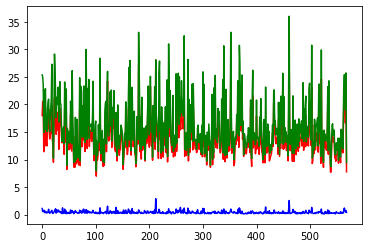

In [22]:
plt.plot(df['radius_mean'],color='red')
plt.plot(df['radius_se'],color='blue')
plt.plot(df['radius_worst'],color='green')

Text(0.5, 1.0, 'Radius Scatter Plots')

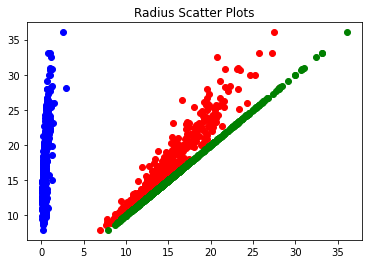

In [23]:
plt.scatter(df['radius_mean'],df['radius_worst'],color='red')
plt.scatter(df['radius_se'],df['radius_worst'],color='blue')
plt.scatter(df['radius_worst'],df['radius_worst'],color='green')
plt.title('Radius Scatter Plots')

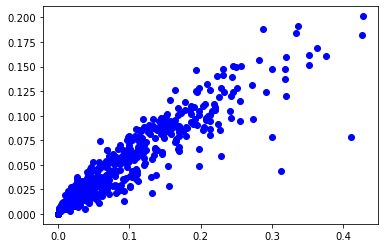

In [24]:
plt.scatter(df1['concavity_mean'],df1['concave points_mean'],color='blue')
plt.style.use('ggplot')

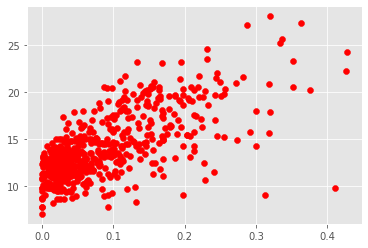

In [25]:
plt.scatter(df['concavity_mean'],df['radius_mean'],color='red')
plt.style.use('ggplot')

<AxesSubplot:>

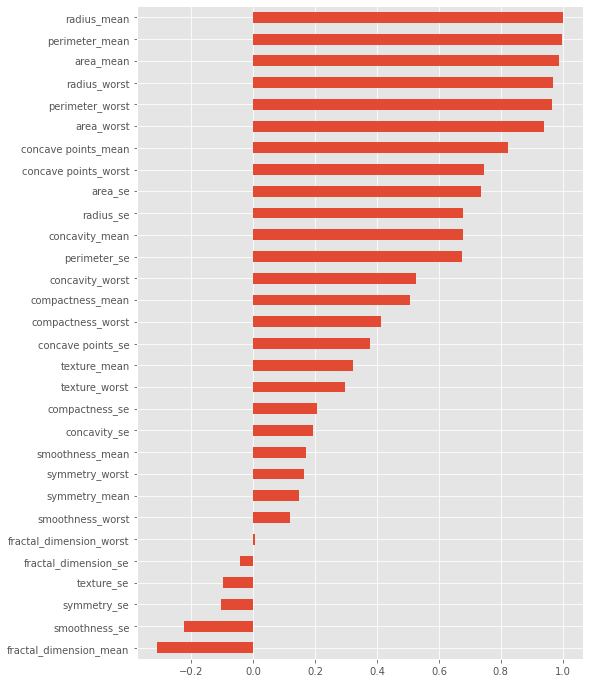

In [26]:
plt.figure(figsize=(8, 12))
df1.corr()['radius_mean'].sort_values().plot(kind='barh')

In [27]:
corr_matrix

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,0.023389,0.236702,0.302418,0.293464,0.071401,0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,0.311631,0.076437,0.261477,0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,0.253691,0.051269,0.205151,0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


In [28]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

In [29]:
upper

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,NaN,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,NaN,NaN,0.329533,0.321086,0.023389,0.236702,0.302418,0.293464,0.071401,0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,NaN,NaN,NaN,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,NaN,NaN,NaN,NaN,0.177028,0.498502,0.685983,0.823269,0.151293,0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,NaN,NaN,NaN,NaN,NaN,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,NaN,NaN,NaN,NaN,NaN,NaN,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.253691,0.051269,0.205151,0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


In [30]:
# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [31]:
to_drop

['perimeter_mean',
 'area_mean',
 'perimeter_se',
 'area_se',
 'radius_worst',
 'perimeter_worst',
 'area_worst']

In [32]:
# Find features with correlation greater than 0.90
to_drop_90 = [column for column in upper.columns if any(upper[column] >= 0.90)]

In [33]:
to_drop_90

['perimeter_mean',
 'area_mean',
 'concave points_mean',
 'perimeter_se',
 'area_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'concave points_worst']

In [34]:
# Drop features * area_se * radius_mean * area_worst * perimeter_worst * radius_worst * concave.points_mean
df2=df.drop(['area_se', 'radius_mean','area_worst','perimeter_worst','concave points_mean'], axis=1)

In [33]:
df2.head()

,id,diagnosis,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,...,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.2419,0.07871,...,0.03003,0.006193,25.38,17.33,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.1812,0.05667,...,0.01389,0.003532,24.99,23.41,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.2069,0.05999,...,0.02250,0.004571,23.57,25.53,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.2597,0.09744,...,0.05963,0.009208,14.91,26.50,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.1809,0.05883,...,0.01756,0.005115,22.54,16.67,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


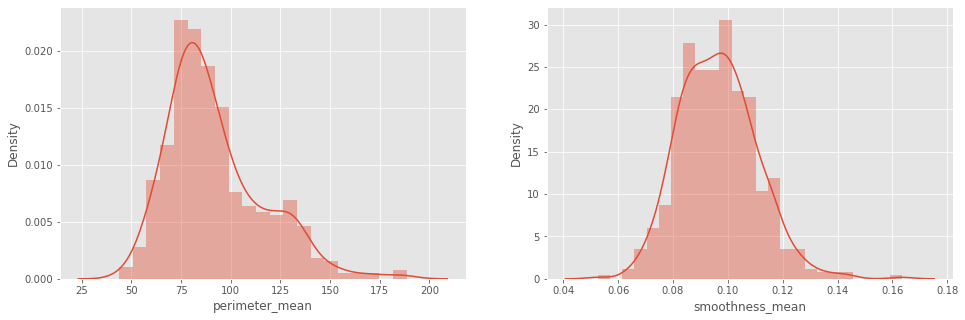

In [35]:
#Histogram overview outliers
#reference:https://www.analyticsvidhya.com/blog/2021/05/feature-engineering-how-to-detect-and-remove-outliers-with-python-code/
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df2['perimeter_mean'])
plt.subplot(1,2,2)
sns.distplot(df2['smoothness_mean'])
plt.show()

In [36]:
#Finding the Boundary Values
print("Highest allowed",df2['perimeter_mean'].mean() + 3*df2['perimeter_mean'].std())
print("Lowest allowed",df2['perimeter_mean'].mean() - 3*df2['perimeter_mean'].std())

Highest allowed 164.86597650818035
Lowest allowed 19.072090275650964


In [37]:
#Finding the Outliers
df1[(df2['perimeter_mean'] > 164.86) | (df2['perimeter_mean'] < 19.07)]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
82,25.22,24.91,171.5,1878.0,0.1063,0.2665,0.3339,0.1845,0.1829,0.06782,...,30.00,33.62,211.7,2562.0,0.1573,0.6076,0.6476,0.2867,0.2355,0.10510
122,24.25,20.20,166.2,1761.0,0.1447,0.2867,0.4268,0.2012,0.2655,0.06877,...,26.02,23.99,180.9,2073.0,0.1696,0.4244,0.5803,0.2248,0.3222,0.08009
180,27.22,21.87,182.1,2250.0,0.1094,0.1914,0.2871,0.1878,0.1800,0.05770,...,33.12,32.85,220.8,3216.0,0.1472,0.4034,0.5340,0.2688,0.2856,0.08082
212,28.11,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,0.1648,0.05525,...,28.11,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,0.1648,0.05525
352,25.73,17.46,174.2,2010.0,0.1149,0.2363,0.3368,0.1913,0.1956,0.06121,...,33.13,23.58,229.3,3234.0,0.1530,0.5937,0.6451,0.2756,0.3690,0.08815
461,27.42,26.27,186.9,2501.0,0.1084,0.1988,0.3635,0.1689,0.2061,0.05623,...,36.04,31.37,251.2,4254.0,0.1357,0.4256,0.6833,0.2625,0.2641,0.07427
521,24.63,21.60,165.5,1841.0,0.1030,0.2106,0.2310,0.1471,0.1991,0.06739,...,29.92,26.93,205.7,2642.0,0.1342,0.4188,0.4658,0.2475,0.3157,0.09671


In [38]:
#Finding the Boundary Values
print("Highest allowed",df2['smoothness_mean'].mean() + 3*df1['smoothness_mean'].std())
print("Lowest allowed",df2['smoothness_mean'].mean() - 3*df1['smoothness_mean'].std())

Highest allowed 0.13855266560809984
Lowest allowed 0.054167896782058154


In [39]:
#Finding the Outliers
df1[(df2['smoothness_mean'] > 0.138) | (df2['smoothness_mean'] < 0.054)]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
105,13.110,15.56,87.21,530.2,0.13980,0.17650,0.2071,0.09601,0.1925,0.07692,...,16.310,22.40,106.40,827.2,0.18620,0.40990,0.6376,0.1986,0.3147,0.14050
122,24.250,20.20,166.20,1761.0,0.14470,0.28670,0.4268,0.20120,0.2655,0.06877,...,26.020,23.99,180.90,2073.0,0.16960,0.42440,0.5803,0.2248,0.3222,0.08009
504,9.268,12.87,61.49,248.7,0.16340,0.22390,0.0973,0.05252,0.2378,0.09502,...,10.280,16.38,69.05,300.2,0.19020,0.34410,0.2099,0.1025,0.3038,0.12520
568,7.760,24.54,47.92,181.0,0.05263,0.04362,0.0000,0.00000,0.1587,0.05884,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [40]:
df2.head()

,id,diagnosis,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,...,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.2419,0.07871,...,0.03003,0.006193,25.38,17.33,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.1812,0.05667,...,0.01389,0.003532,24.99,23.41,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.2069,0.05999,...,0.02250,0.004571,23.57,25.53,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.2597,0.09744,...,0.05963,0.009208,14.91,26.50,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.1809,0.05883,...,0.01756,0.005115,22.54,16.67,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [93]:
df2.diagnosis.value_counts(normalize = True)

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

In [ ]:
#Because we only have less thatn 600 specimen, we are not going to remove the outlier and train the machine learning model first.
#Other white papers also do not remove outliers

In [42]:
# Standardizing our features except target variable
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
stand_scale = df2.drop(['diagnosis'],axis = 1)
col_trans = make_column_transformer(
            (StandardScaler(), stand_scale.columns),
            remainder = 'passthrough')

In [43]:
#reference for evaluation of the models
#https://towardsdatascience.com/how-to-evaluate-your-machine-learning-models-with-python-code-5f8d2d8d945b

In [44]:
#Split Train data and Test data
from sklearn.model_selection import train_test_split
X = df2.drop(['diagnosis'], axis = 1)
y = df2['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [45]:
col_trans.fit_transform(X_train)

array([[-0.23317811, -0.39064196, -1.12855021, ..., -0.75798367,
        -0.01614761, -0.38503402],
       [-0.23991409,  0.68051405, -0.94820146, ..., -0.60687023,
         0.09669004, -0.38615797],
       [-0.23311711, -1.03333557,  0.51394098, ..., -0.02371948,
        -0.20050207, -0.75144254],
       ...,
       [ 7.27895613, -0.20048168, -1.31754581, ..., -0.97974953,
        -0.71542314, -0.11978123],
       [-0.23336823, -0.2245526 , -1.28007609, ..., -1.75401433,
        -1.58157125, -1.00601779],
       [-0.23294935,  1.14989702, -0.71226578, ..., -0.27460457,
        -1.25895095,  0.21515662]])

In [46]:
X_train.head()

,id,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,...,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
338,897880,17.53,64.41,310.8,0.10070,0.07326,0.02511,0.1890,0.06331,0.2619,...,0.02100,0.002778,11.16,26.84,0.1402,0.14020,0.1055,0.06499,0.2894,0.07664
427,90745,21.98,68.79,359.9,0.08801,0.05743,0.03614,0.2016,0.05977,0.3077,...,0.01844,0.002690,12.76,32.04,0.1303,0.16960,0.1927,0.07485,0.2965,0.07662
406,905189,14.86,104.30,800.0,0.09495,0.08501,0.05500,0.1735,0.05875,0.2387,...,0.01500,0.001621,17.71,19.58,0.1206,0.17220,0.2310,0.11290,0.2778,0.07012
96,86211,17.84,77.79,451.1,0.10450,0.07057,0.02490,0.1900,0.06635,0.3661,...,0.02220,0.003408,12.83,20.92,0.1140,0.09358,0.0498,0.05882,0.2227,0.07376
490,91376701,22.44,78.18,466.5,0.08192,0.05200,0.01714,0.1544,0.05976,0.2239,...,0.01608,0.002399,14.17,31.99,0.1256,0.18040,0.1230,0.06335,0.3100,0.08203


In [47]:
X_train.shape

(455, 26)

In [48]:
X_test.head()

,id,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,...,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
512,915691,20.52,88.64,556.7,0.11060,0.14690,0.14450,0.2116,0.07325,0.3906,...,0.01705,0.004005,16.41,29.66,0.15740,0.38560,0.51060,0.20510,0.3585,0.11090
457,9112367,25.25,84.10,537.9,0.08791,0.05205,0.02772,0.1619,0.05584,0.2084,...,0.01347,0.001828,14.35,34.23,0.12890,0.10630,0.13900,0.06005,0.2444,0.06788
439,909410,15.66,89.59,606.5,0.07966,0.05581,0.02087,0.1589,0.05586,0.2142,...,0.01171,0.002104,14.91,19.31,0.10340,0.10170,0.06260,0.08216,0.2136,0.06710
298,892214,18.17,91.22,633.1,0.06576,0.05220,0.02475,0.1635,0.05586,0.2300,...,0.01103,0.001957,16.22,25.26,0.09445,0.21670,0.15650,0.07530,0.2636,0.07676
37,854941,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.1467,0.05863,0.1839,...,0.02671,0.001777,13.30,22.81,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169


In [49]:
X_test.shape

(114, 26)

In [50]:
y_train.head()

338    B
427    B
406    B
96     B
490    B
Name: diagnosis, dtype: object

In [51]:
y_test.head()

512    M
457    B
439    B
298    B
37     B
Name: diagnosis, dtype: object

In [52]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn_scores = []
for k in range(1,31):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    pipe = make_pipeline(col_trans,knn_classifier)
    knn_scores.append(cross_val_score(pipe, X_train, y_train, cv=5, scoring='accuracy').mean())

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

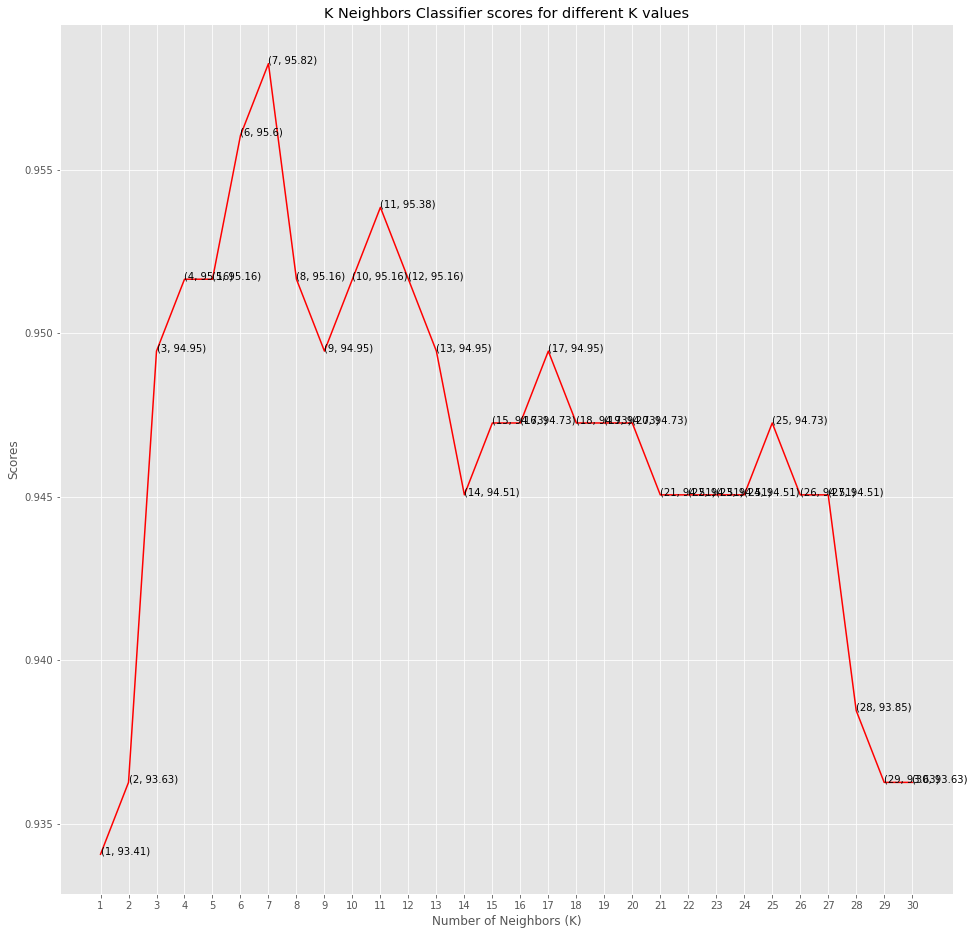

In [53]:
plt.figure(figsize=(16,16))
plt.plot([k for k in range(1, 31)], knn_scores, color = 'red')
for i in range(1,31):
    plt.text(i, knn_scores[i-1], (i, round(knn_scores[i-1]*100,2)))
plt.xticks([i for i in range(1, 31)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [54]:
print('Accuracy score on Train data: {}'.format(knn_scores[4]*100))

Accuracy score on Train data: 95.16483516483515


In [56]:
knn_classifier = KNeighborsClassifier(n_neighbors = 7)
pipe = make_pipeline(col_trans,knn_classifier)
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print('Accuracy score on Test Data: {}'.format(metrics.accuracy_score(y_test,y_pred)*100))

Accuracy score on Test Data: 95.6140350877193


In [58]:
#Support Vector Classifier (SVC)
from sklearn.svm import SVC
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    pipe = make_pipeline(col_trans,svc_classifier)
    svc_scores.append(cross_val_score(pipe, X_train, y_train, cv=5, scoring='accuracy').mean())

Text(0.5, 1.0, 'Support Vector Classifier scores for different kernels')

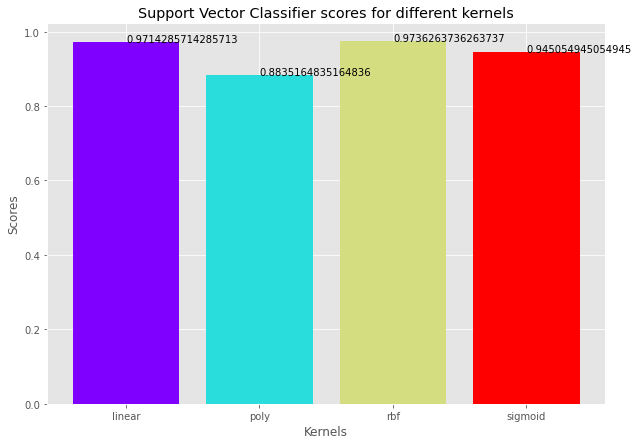

In [59]:
from matplotlib.cm import rainbow
import numpy as np
colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.figure(figsize=(10,7))
plt.bar(kernels, svc_scores, color = colors)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')

In [60]:
print('Accuracy score on Train data: {}'.format(svc_scores[2]*100))

Accuracy score on Train data: 97.36263736263737


In [61]:
svc_classifier = SVC(kernel = 'rbf')
pipe = make_pipeline(col_trans,svc_classifier)
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print('Accuracy score on Test data: {}'.format(metrics.accuracy_score(y_test,y_pred)*100))

Accuracy score on Test data: 97.36842105263158


In [62]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt_scores = []
for i in range(1, len(X.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
    pipe = make_pipeline(col_trans,dt_classifier)
    dt_scores.append(cross_val_score(pipe, X_train, y_train, cv=5, scoring='accuracy').mean())

Text(0.5, 1.0, 'Decision Tree Classifier scores for different number of maximum features')

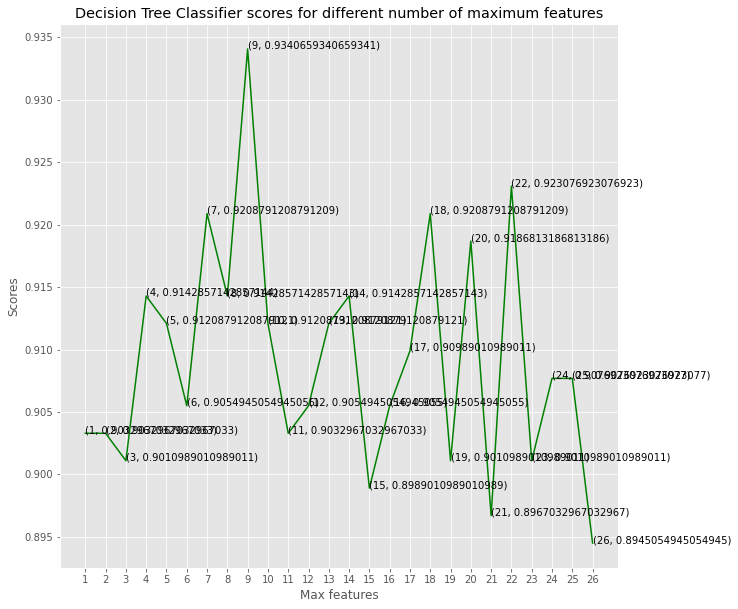

In [63]:
plt.figure(figsize=(10,10))
plt.plot([i for i in range(1, len(X.columns) + 1)], dt_scores, color = 'green')
for i in range(1, len(X.columns) + 1):
    plt.text(i, dt_scores[i-1], (i, dt_scores[i-1]))
plt.xticks([i for i in range(1, len(X.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')

In [64]:
print('Accuracy score on Train data: {}'.format(dt_scores[3]*100))

Accuracy score on Train data: 91.42857142857143


In [65]:
dt_classifier = DecisionTreeClassifier(max_features = 4, random_state = 0)
pipe = make_pipeline(col_trans,dt_classifier)
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print('Accuracy  score on Test data: {}'.format(metrics.accuracy_score(y_test,y_pred)*100))

Accuracy  score on Test data: 92.10526315789474


In [66]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_scores = []
estimators = [10, 100, 200, 500, 1000]
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators = i, random_state = 0)
    pipe = make_pipeline(col_trans,rf_classifier)
    rf_scores.append(cross_val_score(pipe, X_train, y_train, cv=5, scoring='accuracy').mean())

Text(0.5, 1.0, 'Random Forest Classifier scores for different number of estimators')

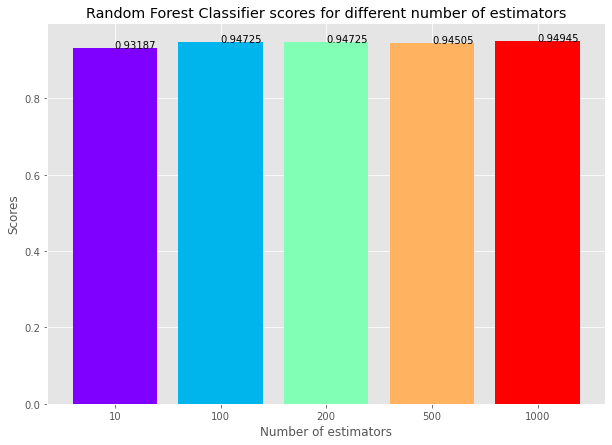

In [67]:
plt.figure(figsize=(10,7))
colors = rainbow(np.linspace(0, 1, len(estimators)))
plt.bar([i for i in range(len(estimators))], rf_scores, color = colors, width = 0.8)
for i in range(len(estimators)):
    plt.text(i, rf_scores[i], round(rf_scores[i],5))
plt.xticks(ticks = [i for i in range(len(estimators))], labels = [str(estimator) for estimator in estimators])
plt.xlabel('Number of estimators')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different number of estimators')

In [68]:
print('Accuracy score on Train data: {}'.format(rf_scores[4]*100))

Accuracy score on Train data: 94.94505494505493


In [69]:
rf_classifier = RandomForestClassifier(n_estimators = 1000, random_state = 0)
pipe = make_pipeline(col_trans,rf_classifier)
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print('Accuracy score on Test data: {}'.format(metrics.accuracy_score(y_test,y_pred)*100))

Accuracy score on Test data: 97.36842105263158


In [80]:
logreg = LogisticRegression(solver='lbfgs')
#pipe = make_pipeline(col_trans,logreg)

In [81]:
pipe = make_pipeline(col_trans,logreg)
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

In [82]:
print('Confusion Matrix - Training Dataset')
print(pd.crosstab(y_train, pipe.predict(X_train), rownames = ['True'], colnames = ['Predicted'], margins = True))

Confusion Matrix - Training Dataset
Predicted    B    M  All
True                    
B          289    1  290
M            5  160  165
All        294  161  455


In [85]:
#Let's check our False Negative rate which makes sense especially in health care field.
5/165

0.030303030303030304

In [86]:
print('Confusion Matrix - Testing Dataset')
print(pd.crosstab(y_test, y_pred, rownames = ['True'], colnames = ['Predicted'], margins = True))

Confusion Matrix - Testing Dataset
Predicted   B   M  All
True                  
B          65   2   67
M           3  44   47
All        68  46  114


In [87]:
#4.25% of observations in testing data are misclassified as Benign
2/47

0.0425531914893617